<a href="https://colab.research.google.com/github/pnistha11/Data-Analysis-Projects/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata")
#df = pd.read_csv("Movie_data/tmdb_5000_movies.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nisthapatel11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


100%|██████████| 8.89M/8.89M [00:00<00:00, 1.46GB/s]

In [ ]:
df = pd.read_csv('/content/tmdb-movie-metadata/tmdb_5000_movies.csv')
print(df.head())


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Data Cleanning

In [ ]:
# 1. Remove duplicates
df_cleaned = df.drop_duplicates()

# 2. Handle missing values
df_cleaned = df_cleaned.dropna(subset=['title', 'release_date'])  # Drop rows with no title or date
df_cleaned = df_cleaned.fillna({'homepage': 'Unknown', 'tagline': 'No tagline'})  # Fill non-critical

# 3. Convert release_date to datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# 4. Handle numeric columns: Convert & replace 0 with NaN
numeric_cols = ['budget', 'revenue', 'runtime']
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned.loc[df_cleaned[col] == 0, col] = pd.NA

# 5. Impute missing numeric values with Median
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# 6. Clean text columns: remove extra spaces
text_cols = ['title', 'original_title', 'overview', 'tagline']
for col in text_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip()

# 7. Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# ----------------------------
# Final Dataset Summary
# ----------------------------
summary = {
    "Rows after cleaning": len(df_cleaned),
    "Missing values after cleaning": df_cleaned.isnull().sum().to_dict()
}

print(summary)

{'Rows after cleaning': 4802, 'Missing values after cleaning': {'budget': 0, 'genres': 0, 'homepage': 0, 'id': 0, 'keywords': 0, 'original_language': 0, 'original_title': 0, 'overview': 0, 'popularity': 0, 'production_companies': 0, 'production_countries': 0, 'release_date': 0, 'revenue': 0, 'runtime': 0, 'spoken_languages': 0, 'status': 0, 'tagline': 0, 'title': 0, 'vote_average': 0, 'vote_count': 0}}


In [ ]:
# Data Cleaning
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Replace zero budget/revenue with NaN
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

# Drop rows with missing essential values
df = df.dropna(subset=['year','budget','revenue','runtime'])

# Parse genres (stringified list → Python list)
def parse_genres(genres_str):
    if pd.isna(genres_str):
        return []
    try:
        parsed = ast.literal_eval(genres_str)
        return [g['name'] for g in parsed]
    except:
        return []

df['genres_list'] = df['genres'].apply(parse_genres)

# Explode so that each movie-genre pair is a separate row
df_g = df.explode('genres_list').rename(columns={'genres_list': 'genre'})


/tmp/ipython-input-2626224421.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['vote_average'], weights=x['vote_count']))


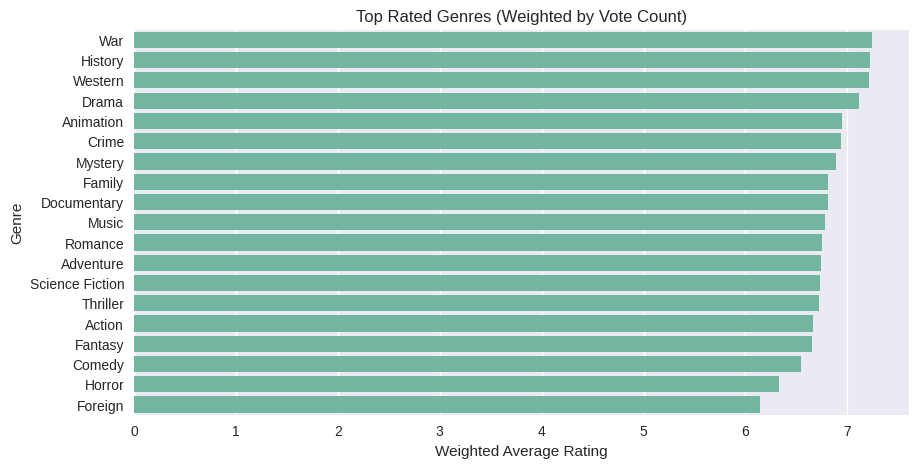

In [ ]:
# 4. Task A – Top Rated Genres
# -------------------------------
genre_ratings = (
    df_g.groupby('genre')
        .apply(lambda x: np.average(x['vote_average'], weights=x['vote_count']))
        .reset_index(name='weighted_rating')
        .sort_values(by='weighted_rating', ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(data=genre_ratings, x='weighted_rating', y='genre')
plt.title("Top Rated Genres (Weighted by Vote Count)")
plt.xlabel("Weighted Average Rating")
plt.ylabel("Genre")
plt.show()


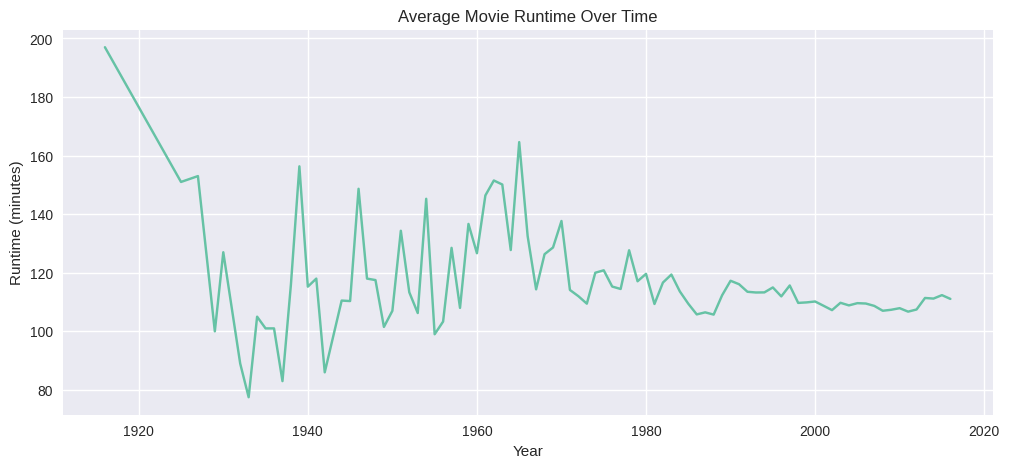

In [ ]:
# 5. Task B – Runtime Over Time
# -------------------------------
runtime_trend = df.groupby('year')['runtime'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=runtime_trend, x='year', y='runtime')
plt.title("Average Movie Runtime Over Time")
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.show()


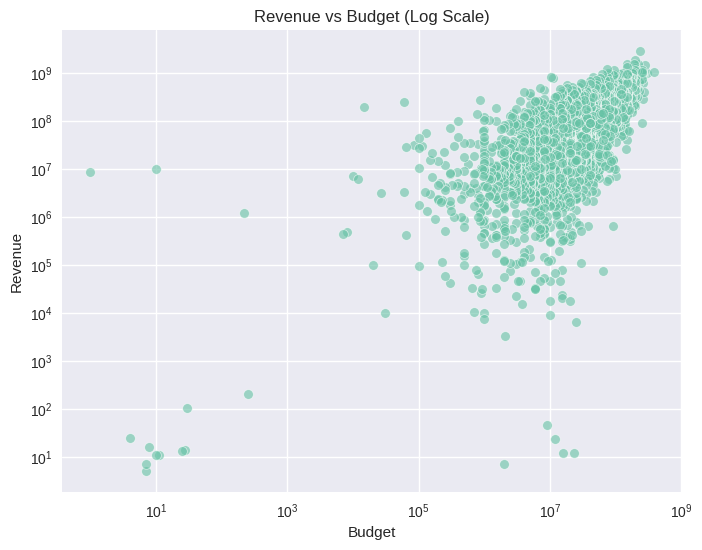

In [ ]:
# 6. Task C – Revenue vs Budget
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Revenue vs Budget (Log Scale)")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


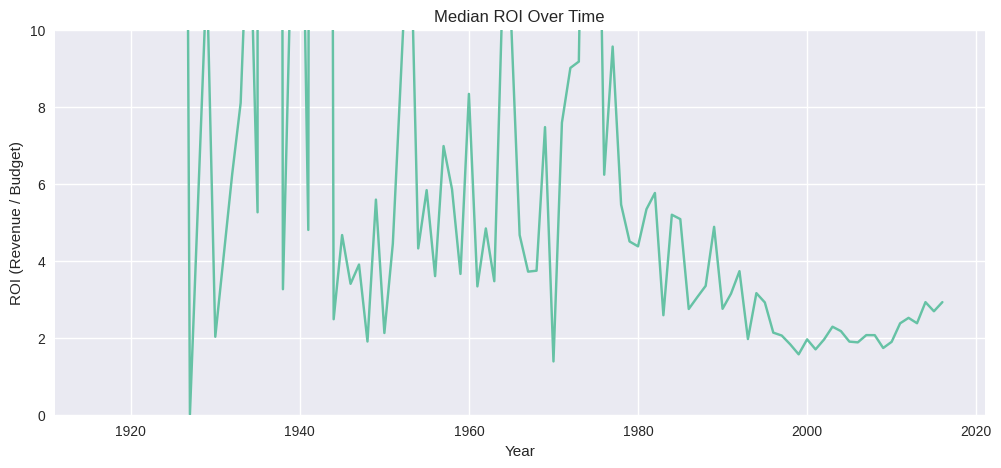

In [ ]:
# ROI analysis
df['ROI'] = df['revenue'] / df['budget']
roi_summary = df.groupby('year')['ROI'].median().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=roi_summary, x='year', y='ROI')
plt.title("Median ROI Over Time")
plt.xlabel("Year")
plt.ylabel("ROI (Revenue / Budget)")
plt.ylim(0,10)   # limit scale for readability
plt.show()